In [1]:
#import packages
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#import pre-processed file
df = pd.read_csv("eurovision_preprocessed.csv")

In [16]:
#Select lyrics
lyrics = df["Lyrics translation"]

In [17]:
#Merge lyrics 
merged_lyrics = " ".join(lyrics)

In [18]:
merged_lyrics = merged_lyrics.lower()

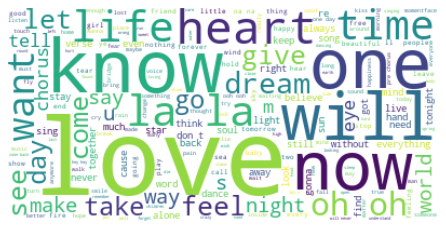

In [66]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white").generate(merged_lyrics)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('word_cloud.png',bbox_inches='tight', dpi=300)
plt.show()


In [20]:
#Scores
scores = df.iloc[:,9]

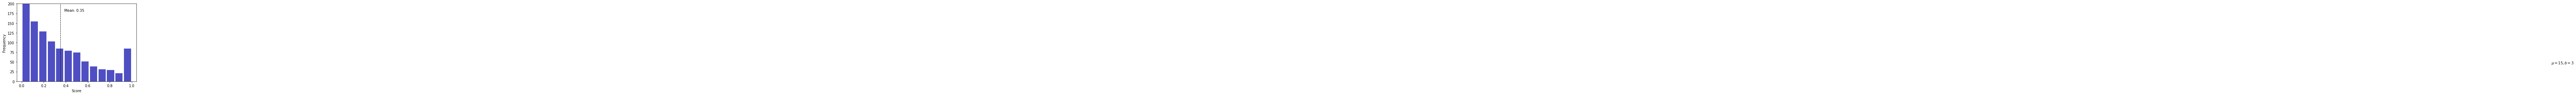

In [22]:
# Frequency distribution of scores
n, bins, patches = plt.hist(x=scores, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.xlabel('Score')
plt.ylabel('Frequency')

plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.axvline(scores.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(scores.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(scores.mean()))
plt.savefig('Scores.png')
plt.show()

In [23]:
#Audio Features
audio = df.iloc[:,21:30]

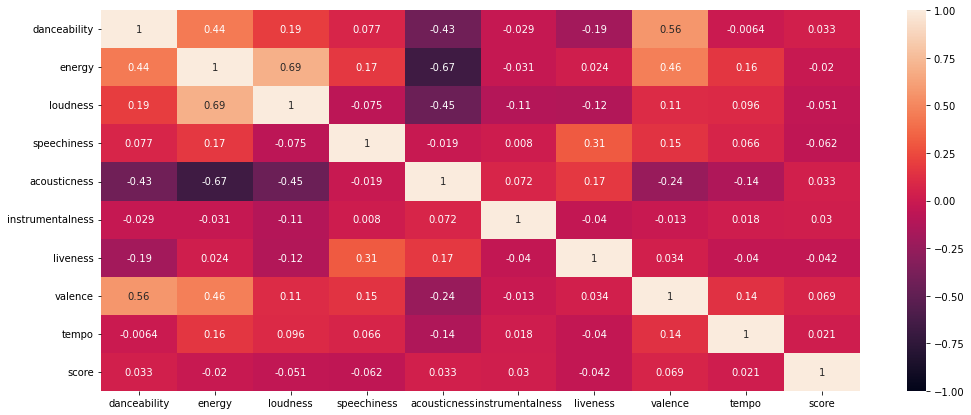

In [67]:
#Correlation matrix of audio features
plt.figure(figsize=(17, 7))
heatmap = sns.heatmap(correlation_mat, vmin=-1, vmax=1, annot=True)
plt.savefig('corr_matrix.png', dpi=300, bbox_inches='tight')

In [26]:
#Calculating word count for every lyrics
word_count=[]
for lyric in lyrics :
    count = len(lyric.split())
    word_count.append(count)

In [27]:
#Appending counts of lyrics to df
df["word_count"]=word_count

In [29]:
# Convert to array 
word_count = np.array(word_count)

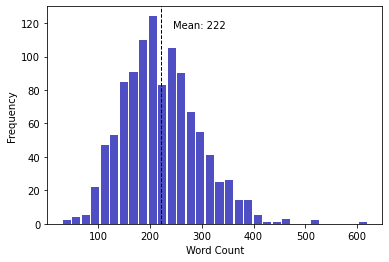

In [73]:
# Frequency distribution of word count
n, bins, patches = plt.hist(x=word_count, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.xlabel('Word Count')
plt.ylabel('Frequency')
#plt.title('My Very Own Histogram')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.axvline(word_count.mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(word_count.mean()*1.1, max_ylim*0.9, 'Mean: {:.0f}'.format(word_count.mean()))
plt.savefig('word_count.png')
plt.show()

In [31]:
#Song with the shortest lyric
df[df["word_count"]==np.min(word_count)]

,Unnamed: 0,Country,#.1,Artist,Song,Language,Pl.,Sc.,Eurovision_Number,standard_score,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,word_count
511,511,Norway,35,Secret Garden,Nocturne,Norwegian,1.0,148.0,40,1.0,...,0,0,0,0,0,0,0,0,0,30


In [32]:
#Song with the longest lyric
df[df["word_count"]==np.max(word_count)]

,Unnamed: 0,Country,#.1,Artist,Song,Language,Pl.,Sc.,Eurovision_Number,standard_score,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,word_count
723,723,Macedonia,7,Karolina (2),Mojot svet (Мојот свет),Macedonian/English,14.0,73.0,52,0.258555,...,0,0,0,0,0,0,0,0,0,620
